In [1]:
source('~/pycharmprojects/nyu-research/ts.R')


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.2 



In [2]:
time_index <- function(df){
  #indexes a dataframe by 30 days and 24 hours
  
  times = data.frame()
  for (d in 1:30){
    for (h in 0:23){
      times = rbind(times, c(d, h, 0))
    }
  }
  colnames(times) = c('day', 'hour', 'tweets')
  colnames(df) = c('day', 'hour', 'tweets')
  merged = merge(times, df, by=c('day', 'hour'), all='TRUE')
  merged[is.na(merged)] = 0
  merged['tweets'] = pmax(merged$tweets.x,merged$tweets.y)
  return (merged)
}

In [3]:
preprocessing_df <- function(ts, total, thres=5000){
  
  # removes rows with low observations and locfs them
  # returns time series and total time series, as a list
  
  df = time_index(data.frame(ts))
  df_total = time_index(data.frame(total))
  
  missing = df_total[,'tweets']<thres
  print(which(missing))
  df_total[missing, 'tweets'] <- NA
  df[missing,] <-NA
  df_total = na.locf(df_total[,'tweets'])
  df_filled = (na.locf(df[, ncol(df)]))
  
  return(list(series=df_filled, total=df_total))
}

In [4]:
j_tob <- read.csv('~/documents/hpc-test/summary/summary/present.csv')

In [5]:
head(j_tob)

day,hour,sum,len
1,0,2,6004
1,1,4,3852
1,2,0,2415
1,3,0,1762
1,4,1,1648
1,5,0,2091


In [6]:
pres <- j_tob[c(1,2,3)]
tot <- j_tob[c(1,2,4)]

In [7]:
new <- preprocessing_df(pres, tot)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


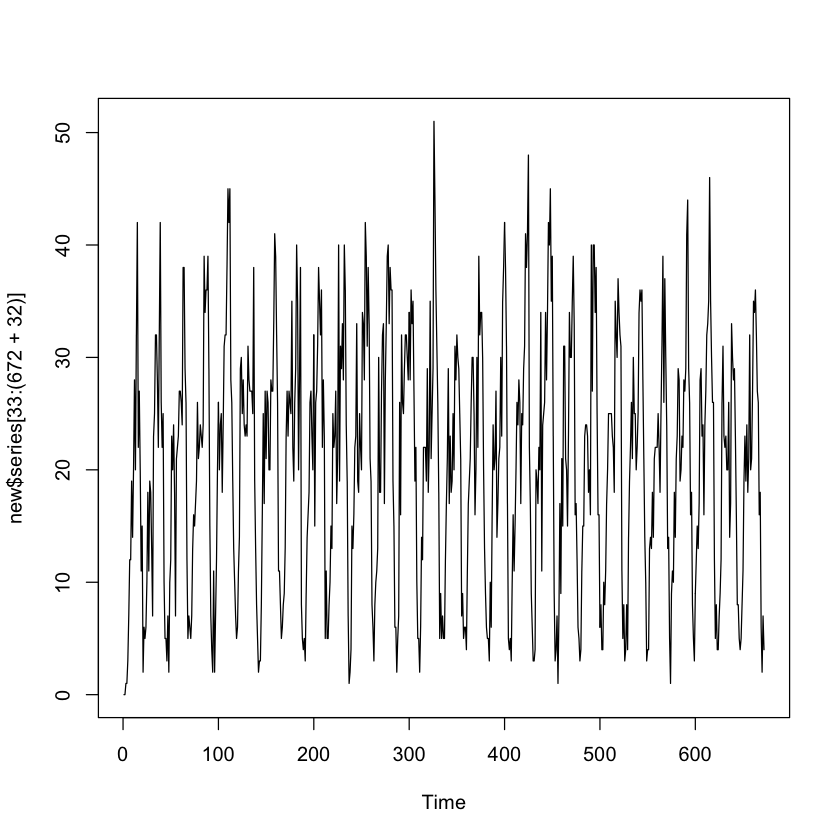

In [8]:
plot.ts(new$series[33:(672+32)])

In [9]:
new_perc <- ts((new$series/new$total)[33:(672+32)], frequency=24)

In [10]:
ts_pres <- ts((new$series)[33:(672+32)], frequency=24)

In [11]:
new.1 = as.numeric(window(new_perc, start=c(1, 1), end= c(7, 24)))
new.2 = as.numeric(window(new_perc, start=c(8, 1), end= c(14, 24)))
new.3 = as.numeric(window(new_perc, start=c(15, 1), end= c(21, 24)))
new.4 = as.numeric(window(new_perc, start=c(22, 1), end= c(28, 24)))
pres.1 = as.numeric(window(ts_pres, start=c(1, 1), end= c(7, 24)))
pres.2 = as.numeric(window(ts_pres, start=c(8, 1), end= c(14, 24)))
pres.3 = as.numeric(window(ts_pres, start=c(15, 1), end= c(21, 24)))
pres.4 = as.numeric(window(ts_pres, start=c(22, 1), end= c(28, 24)))

In [12]:
weeks = data.frame(new.1, new.2, new.3, new.4)
abs_tob = data.frame(pres.1, pres.2, pres.3, pres.4)

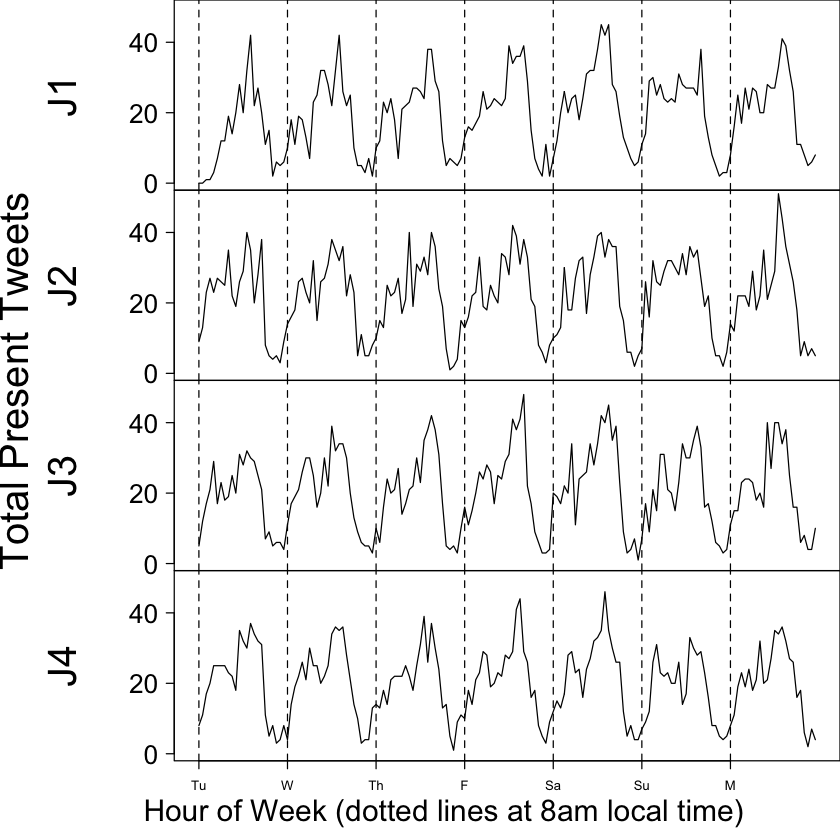

In [13]:
# Absolute number of tweets per hour
plot_weeks <- function(){
#     week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
    week_names = c('J1', 'J2', 'J3', 'J4')
par(mfrow=c(4,1))
# outer margin
par(oma = c(5, 3, 0, 0))

shade_color <- rgb(0, 0, 190, alpha=50, maxColorValue=255)
for (col in 1:4){
    # remove space for x-axis
    par(mar = c(0, 8, 0, 0))
    yrange = c(0, 50)
    plot(abs_tob[, col], type='l', xaxt='n', ylim=yrange, yaxt='n', ylab='')
    title(cex.lab =3, ylab=week_names[col], line=6)
    axis(2, labels = c('0', '20', '40'), at=c(0, 20, 40), las = 1, cex.axis=2)
    abline(v=seq(1, 168, by=24), lty=2)

}

mtext('Total Present Tweets', cex=2, side = 2, outer = TRUE, line = 1)
mtext('Hour of Week (dotted lines at 8am local time)', cex=1.5, side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)

    
}
plot_weeks()

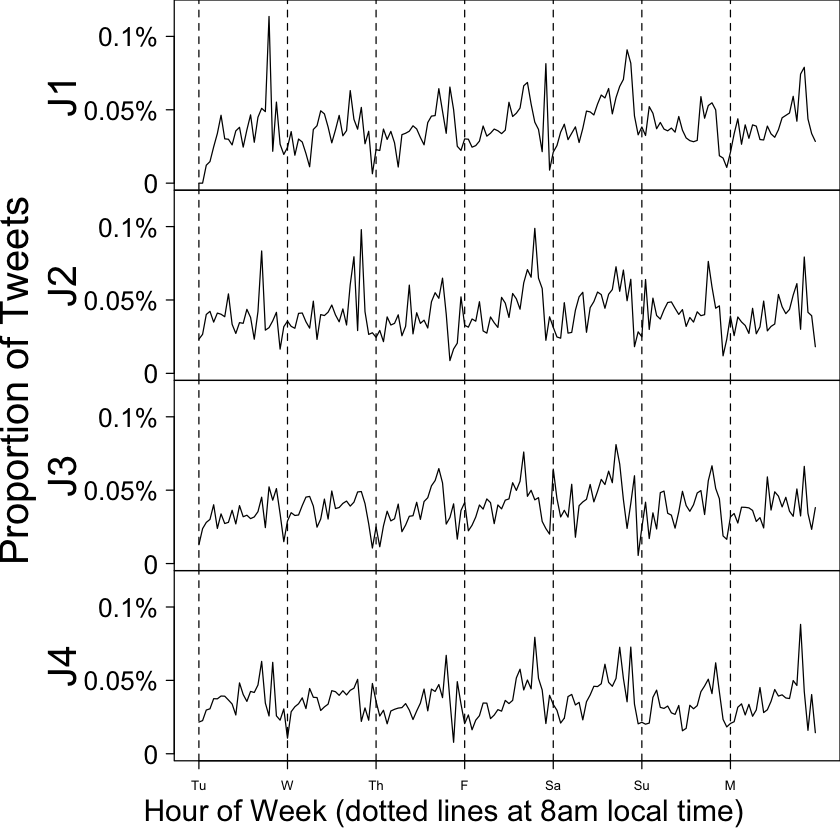

In [14]:
# proportion of tweets per hour
plot_weeks <- function(){
#     week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
    week_names = c('J1', 'J2', 'J3', 'J4')
par(mfrow=c(4,1))
# outer margin
par(oma = c(5, 3, 0, 0))

shade_color <- rgb(0, 0, 190, alpha=50, maxColorValue=255)
for (col in 1:4){
    # remove space for x-axis
    par(mar = c(0, 8, 0, 0))
    yrange = c(0, 0.0012)
    plot(weeks[, col], type='l', xaxt='n', ylim=yrange, yaxt='n', ylab='')
    title(cex.lab =3, ylab=week_names[col], line=6)
    axis(2, labels = c('0', '0.05%', '0.1%'), at=c(0, 0.0005, 0.001), las = 1, cex.axis=2)
    abline(v=seq(1, 168, by=24), lty=2)

}

mtext('Proportion of Tweets', cex=2, side = 2, outer = TRUE, line = 1)
mtext('Hour of Week (dotted lines at 8am local time)', cex=1.5, side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)

    
}
plot_weeks()

In [15]:
library('TSclust')

Loading required package: wmtsa
Loading required package: pdc
Loading required package: cluster


In [16]:
library(factoextra)

Loading required package: ggplot2
Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [17]:
weekdays = rep(c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M'), 4)

In [18]:
ts_pres

Time Series:
Start = c(1, 1) 
End = c(28, 24) 
Frequency = 24 
  [1]  0  0  1  1  3  7 12 12 19 14 20 28 20 32 42 22 27 20 11 15  2  6  5  6 10
 [26] 18 11 19 18 13  7 23 25 32 32 28 22 32 42 26 22 25 10  5  5  3  7  2 10 12
 [51] 23 20 24 18  7 21 22 23 27 27 26 24 38 38 29 26 12  5  7  6  5  7 13 16 15
 [76] 17 19 26 21 22 24 23 22 24 39 34 36 36 39 29 15  7  4  2 11  2  7 12 20 26
[101] 20 24 25 18 24 31 32 32 38 45 42 45 28 26 19 13 10  7  5  6 11 14 29 30 25
[126] 28 24 23 24 23 31 28 27 27 27 25 38 19 13  8  5  2  3  3  8 16 25 17 27 21
[151] 27 26 20 20 28 27 27 33 41 39 32 26 11 11  8  5  6  8  9 13 23 27 23 27 26
[176] 25 35 22 19 26 29 40 35 20 28 38  8  5  4  5  3  9 14 16 18 26 27 23 20 32
[201] 15 26 27 31 38 35 32 36 22 28 23  5 11  5  5  8 10 15 13 25 22 23 27 17 21
[226] 40 19 31 29 33 28 40 36 24 19  7  1  2  4 15 13 16 22 23 33 19 18 25 22 20
[251] 34 33 28 42 39 31 38 33 21 19  8  6  3  8 10 11 13 30 18 18 27 32 33 17 28
[276] 33 39 40 33 38 36 36 19 15  6  6  2  5  

In [28]:
june_days = split_by_day(new_perc)
colnames(june_days)=weekdays
dist = diss(june_days, METHOD = 'EUCL')
b = agnes(dist, diss=TRUE)

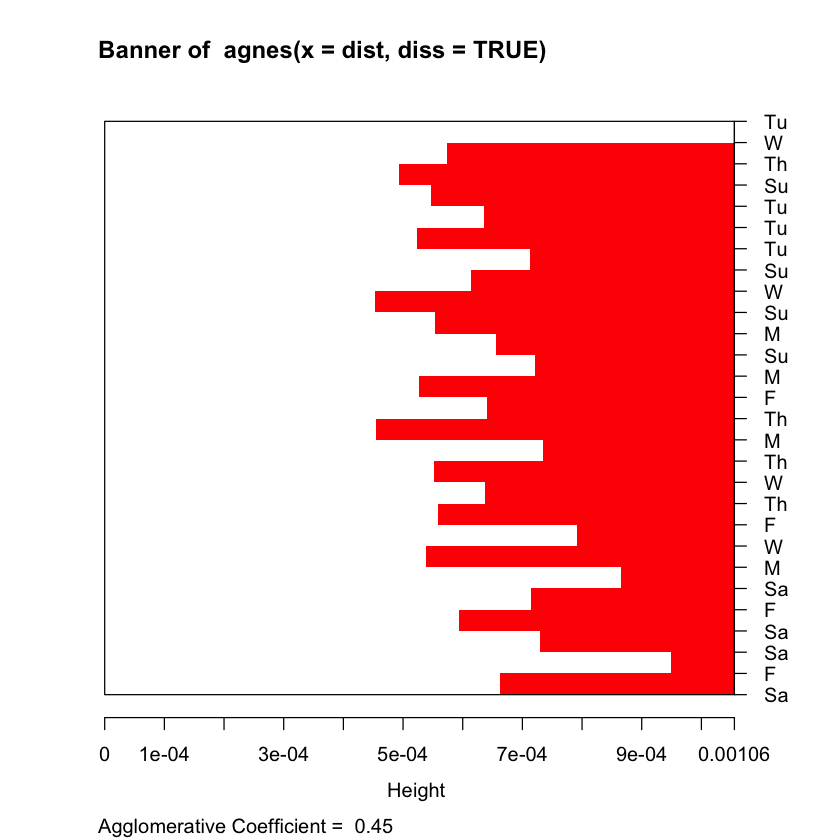

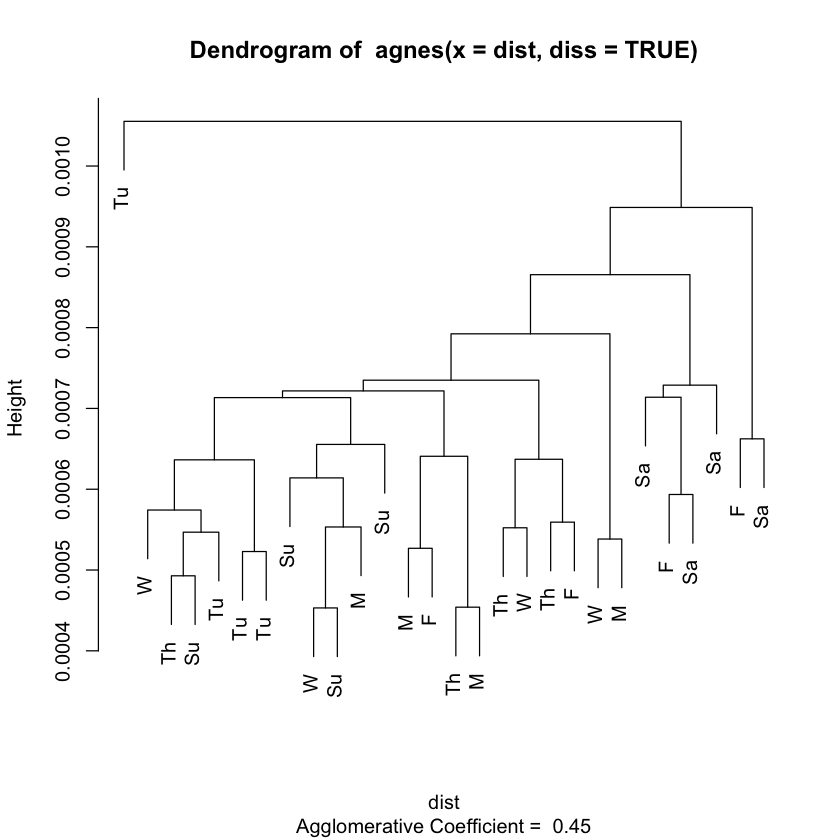

In [29]:
plot(b)

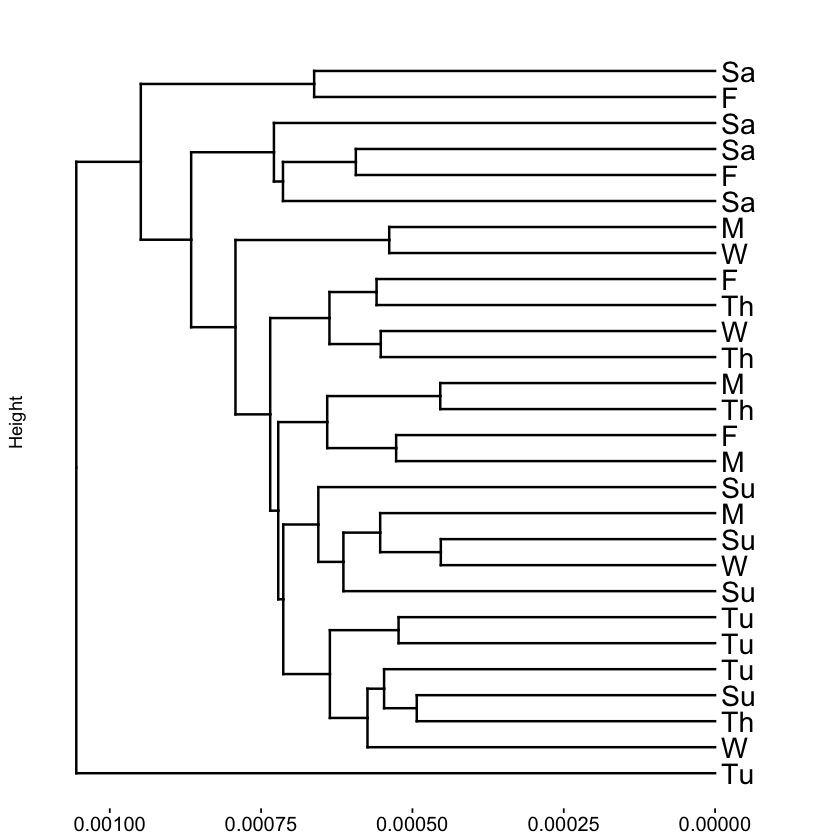

In [43]:
euc_dend <-function(){
    fviz_dend(b, rect=TRUE, main='', ylab='', xlab='Height', 
              las=1, cex=1.2, cex.lab=1.5, horiz=TRUE)
    #mtext( text='Day of Week', side=2, cex=1.5)
}
euc_dend()